In [3]:
using PyCall, PyPlot
patch = pyimport("matplotlib.patches")
proj3d = pyimport("mpl_toolkits.mplot3d.proj3d")

@pydef mutable struct Arrow3D <: patch.FancyArrowPatch
    __init__(self, xs, ys, zs; kwargs...) = begin
        patch.FancyArrowPatch.__init__(self, (0,0), (0,0); kwargs...)
        self._verts3d = xs, ys, zs
    end

    draw(self, renderer) = begin
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[1],ys[1]),(xs[2],ys[2]))
        patch.FancyArrowPatch.draw(self, renderer)
    end
end

PyObject <class 'Arrow3D'>

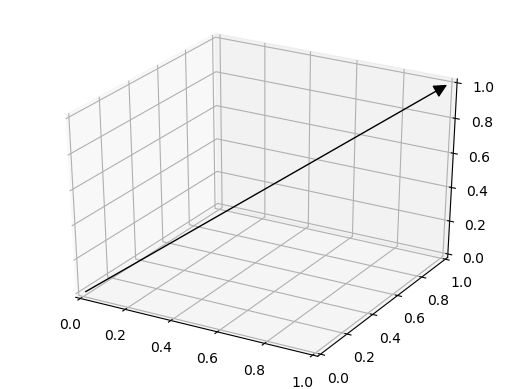

PyObject <Arrow3D object at 0x140a475f8>

In [4]:
a = Arrow3D([0,1],[0,1],[0,1], mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
ax = subplot(projection = "3d")
ax.add_artist(a)

In [5]:
function draw3DArrow(p1, p2; ax=subplot(projection = "3d"), size=20, kwargs...)
    a = Arrow3D([p1[1],p2[1]],[p1[2],p2[2]],[p1[3],p2[3]]; mutation_scale=size, kwargs...)
    ax.add_artist(a)
end

draw3DArrow (generic function with 1 method)